<a href="https://colab.research.google.com/github/ArnovanHilten/GenNet/blob/dev/examples/A_to_Z/GenNet_A_to_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GenNet: Framework for Interpretable Neural Networks for Genetics

In this network we show all steps for using [GenNet](https://github.com/ArnovanHilten/GenNet).



1.   Installing GenNet
2.   Test GenNet Instalation with a quick run
3.   GenNet: from Plink to Prediction
      1. Converting Plink or VCF files
      2. Creating the network
      3. Running the network
      4. Plotting the results






**To start the tutorial:**
Click `file > Save a copy` in drive to save a copy in your own drive for full permisison.

## Installing GenNet

All comments cells that open with **%%bash** are inputs for the command line.

The requirements for GenNet can be found in the README of the github: https://github.com/ArnovanHilten/GenNet

**Note:** GenNet can run on CPU and GPU. If you want to use GenNet with your GPU you need to ensure that you have CUDA installed that works with the tensorflow version.

In [1]:
%%bash
git clone -b dev https://github.com/ArnovanHilten/GenNet.git  # Cloning the repositorie

fatal: destination path 'GenNet' already exists and is not an empty directory.


Move into the GenNet directory

In [2]:
%cd GenNet

/content/GenNet


Install the requirements

In [3]:
#@title Default title text
%%bash
 # navigate to the created folder
pip3 install --upgrade pip  # update pip is recommended but not a necessity
pip3 install -r requirements_GenNet.txt # install all the requirementes voor GenNet.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


If we want to convert data it is recommended to install bitarray as well

In [4]:
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Test GenNet installation

Running the classification example:


*   **-path** is the path to the directory containing the files necessary to run GenNet.
*   **-ID is** the experment id. Make this unique for each experiment.



### Classification example

In [5]:
%%bash
cd GenNet # move into the GenNet folder
python GenNet.py train -path ./examples/example_classification/ -ID 9999 -epochs 50  # run the classificaiton example.

number of covariates: 0
Covariate columns found: []
mode is classification
weight_possitive_class 1
weight_possitive_class 1
jobid =  9999
folder = GenNet_experiment_9999
batchsize = 32
lr = 0.001
Creating networks from npz masks
regression False
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 100, 1)       0           input_layer[0][0]                
__________________________________________________________________________________________________
LocallyDirected_0 (LocallyDirec (None, 10, 1)        110         reshape[0][0]                    
_____________________________________________

bash: line 1: cd: GenNet: No such file or directory
2022-06-04 19:37:49.374228: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-04 19:37:49.430119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 19:37:49.431000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-06-04 19:37:49.431445: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-06-04 19:37:49.433336: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-06-04 19:37:49.433

### Results
Results can be found in GenNet/results/

In [17]:
%%bash
ls results

GenNet_experiment_100001_
GenNet_experiment_9999_


In [18]:
ls results/GenNet_experiment_9999_

bestweights_job.h5      ptest.npy         Summary_results.csv
connection_weights.csv  pval.npy          train_log.csv
model_architecture.txt  Results_9999.txt  train_val_loss.png


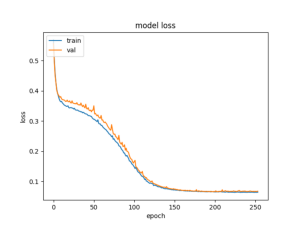

In [31]:
## Checking the learn curve

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('results/GenNet_experiment_9999_/train_val_loss.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [37]:
import pandas as pd
pd.read_csv('results/GenNet_experiment_9999_/Summary_results.csv', index_col = 0)

,Jobid,Datapath,genotype_path,Batchsize,Learning rate,L1 value,patience,epoch size,epochs,Weight positive class,AUC validation,AUC test
0,9999,./examples/example_classification/,./examples/example_classification/,32,0.001,0.01,50,4000,50,1,0.978326,0.979852


### Help function

For more information and options see the --help function:

In [38]:
!python GenNet.py --help # to see the general options

usage: GenNet.py [-h] {convert,train,plot,topology} ...

GenNet: Interpretable neural networks for phenotype prediction.

positional arguments:
  {convert,train,plot,topology}
                        GenNet main options
    convert             Convert genotype data to hdf5
    train               Trains the network
    plot                Generate plots from a trained network
    topology            Create standard topology files

optional arguments:
  -h, --help            show this help message and exit

Check the wiki on github.com/arnovanhilten/gennet/ for more info


In [39]:
!python GenNet.py train --help # to see the options for GenNet train

usage: GenNet.py train [-h] -path PATH -ID ID [-genotype_path GENOTYPE_PATH]
                       [-network_name NETWORK_NAME]
                       [-problem_type {classification,regression}]
                       [-wpc weight positive class] [-lr learning rate]
                       [-bs batch size] [-epochs number of epochs] [-L1]
                       [-mixed_precision] [-suffix extra_info]
                       [-out outfolder]
                       [-mask_order mask_order [mask_order ...]]
                       [-epoch_size epoch_size] [-patience patience] [-resume]

optional arguments:
  -h, --help            show this help message and exit
  -path PATH            Path to the data. Subject file, npz masks/topology
                        and/or genotype.h5
  -ID ID                Number of the experiment
  -genotype_path GENOTYPE_PATH
                        Path to genotype data if the location is not the same
                        as given in -path
  -network_name N

## GenNet: from Plink to Prediction 

### Converting the data

You can do this step by step or use the flag  -step **all**. If you want to use a cluster and run the preprocessing in parallel (recommended for datasets > 100 gb) use the steps and add the -n_jobs with the number of parallel jobs. Each output will guide you trough the next step

*Note: HDF5 reads fast the rows but not the columns so we need to transpose the data since we want to train the network per patient.*

*   **hase_convert**: Converts the data into hdf5 format. Each row is a SNP, each column is a patient
*   **merge**: Merge the hase_covert chunks in a single file
*   **impute_missing**: Impute missing SNP values in the genotype matrix to have the mean value over all others
*   **exclude**: Exclude the SNPs you dont need to limit computational cost
*   **transpose**: Transposes the genotype matrix to have individuals on each row and SNPs for the columns.
*   **merge_transpose**: Merge the transposed genotype matrix in a single file

*If you have a lot of RAM available and a large dataset that will fit into this memory, it might be faster to use a simple script to transpose the matrix in memory*



In [40]:
!python GenNet.py convert --help # show the options for converting the data

usage: GenNet.py convert [-h] [-g GENOTYPE [GENOTYPE ...]] -study_name
                         STUDY_NAME [STUDY_NAME ...] [-variants VARIANTS]
                         [-o OUT] [-ID] [-vcf] [-tcm TCM]
                         [-step {all,hase_convert,merge,impute_missing,exclude,transpose,merge_transpose,checksum}]
                         [-n_jobs N_JOBS] [-comp_level COMP_LEVEL]

optional arguments:
  -h, --help            show this help message and exit
  -g GENOTYPE [GENOTYPE ...], --genotype GENOTYPE [GENOTYPE ...]
                        Path/paths to genotype data folder
  -study_name STUDY_NAME [STUDY_NAME ...]
                        Name for saved genotype data, without ext
  -variants VARIANTS    Path to file with row numbers of variants to include,
                        if none is given all variants will be used
  -o OUT, --out OUT     Path for saving the results, default ./processed_data
  -ID                   Flag to convert minimac data to genotype per subject
     

In [9]:
!python GenNet.py convert -g ./examples/A_to_Z/plink/ -o ./examples/A_to_Z/processed_data/  -study_name GenNet_simulation -step all

The folders: probes, genotype and individuals already exist. Data seems already in HASE format. Delete the folders if the files are not converted properly. Continuing with the current files:
./examples/A_to_Z/processed_data// <class 'str'>
number of files  1

 merge all files...
100% 1/1 [00:00<00:00, 70.27it/s]
merged shape = (100, 14000)
probe shape = (100, 6)

 impute missing...
14000
100% 2/2 [00:00<00:00, 77.66it/s]
WARNING skipped step 4, all variants are used: using ./examples/A_to_Z/processed_data///GenNet_simulation_step3_genotype_no_missing.h5
chuncksize = 14000
100% 2/2 [00:00<00:00, 74.53it/s]
Completed GenNet_simulation
You can delete all other h5 files if genotype.h5 is correct


### Creating the network 

Now make the neural network from prior biological knowledge. Here we will use gene annotations. In the framework there is also the possibility to use gene annotations and KEGG pathway annotations. GenNet topology allows for the fast creation of gene and pathway layers. You can make an .npz mask or a topology.csv



---



Other prior biological knowledge based layers can be easily created:

*A .npz mask is recommended if you want to make a deeper network since it provides more flexibility.*

For the GenNet layer you need to have this npz mask to guide the network connections. The mask is simply a connectivity matrix:
    # The matrix has the shape of (N_nodes_layer_1, N_nodes_layer_2).
    # It is a sparse matrix with zeros for no connections and ones if there is a connections. For example.
    #             output
    #           1 2 3 4 5
    # input 1 | 1 0 0 0 0 |
    # input 2 | 1 1 0 0 0 |
    # input 3 | 0 1 0 0 0 |
    # input 4 | 0 1 0 0 0 |
    # input 5 | 0 0 1 0 0 |
    # input 6 | 0 0 0 1 0 |
    # input 7 | 0 0 0 1 0 |
    # This connects the first two inputs (1,2) to the first neuron in the second layer.
    # Connects input 2,3 and 4 to output neuron 2.
    # Connects input 5 to output neuron 3
    # Connects input 6 and 7 o the 4th neuron in the subsequent layer
    # Connects nothing to the 5th neuron
    #
    # Writtem for Gennet framework: interpretable neural networks for phenotype prediction
    # (https://www.biorxiv.org/content/10.1101/2020.06.19.159152v1.full)


Run Annovar (https://annovar.openbioinformatics.org/en/latest/) or your  favorite annotation tool to gain the biological knowledge (e.g gene annotations) to build your network. For annovar we can obtain the right input format with:

In [10]:
!python GenNet.py topology -type create_annovar_input -path ./examples/A_to_Z/processed_data/ -study_name GenNet_simulation -out examples/A_to_Z/processed_data/


(100, 6)
Number of variants (100, 6)


Annovar input files ready 

Install annovar: https://doc-openbio.readthedocs.io/projects/annovar/en/latest/user-guide/download/
Navigate to annovar, e.g cd /home/charlesdarwin/annovar/
Update annovar:
 perl annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene humandb/
Run:
 perl annotate_variation.pl -geneanno -dbtype refGene -buildver hg19 examples/A_to_Z/processed_data//annovar_input_GenNet_simulation.csv humandb --outfile examples/A_to_Z/processed_data//GenNet_simulation_RefGene


After obtaining the Annovar annotations, run topology create_gene_network to get the topology file for the SNPs-gene-output network:


Now run the given lines in the folder with annovar:

```
perl annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene humandb/
```
After updating the obtaining the annotation:
```
 perl annotate_variation.pl -geneanno -dbtype refGene -buildver hg19 examples/A_to_Z/processed_data//annovar_input_GenNet_simulation.csv humandb --outfile examples/A_to_Z/processed_data//GenNet_simulation_RefGene

```



For this example the gene annotations from Annovar are already placed in the processed data folder:

In [11]:
%ls examples/A_to_Z/processed_data/

annovar_input_GenNet_simulation.csv                genotype/
gene_network_description.csv                       genotype.h5
GenNet_simulation_RefGene.exonic_variant_function  individuals/
GenNet_simulation_RefGene.variant_function         probes/
GenNet_simulation_std.npy                          SNP_gene_mask.npz
GenNet_simulation_step2_merged_genotype.h5         topology.csv
GenNet_simulation_step3_genotype_no_missing.h5


In [12]:
!python GenNet.py topology -type create_gene_network -path examples/A_to_Z/processed_data/ -out examples/A_to_Z/processed_data/ -study_name GenNet_simulation


GenNet_simulation
99
Topology file saved: examples/A_to_Z/processed_data///topology.csv
Alternatively you can choose to use the .npz mask (building blocks for deeper networks) examples/A_to_Z/processed_data///SNP_gene_mask The mask has shape: (100, 10)


In [13]:
## move files to runfolder

### Train the Network

In [14]:
!python GenNet.py train -path examples/A_to_Z/run_folder/ -ID 100001 -epochs 50

number of covariates: 0
Covariate columns found: []
mode is classification
weight_possitive_class 1
weight_possitive_class 1
jobid =  100001
folder = GenNet_experiment_100001
batchsize = 32
lr = 0.001
Creating networks from npz masks
regression False
2022-06-04 19:38:15.506907: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-04 19:38:15.535233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 19:38:15.535837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-06-04 19:38:15.536161: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dy